# Entropy


A measure of the average "information content" of a random variable.

More precisely, a measure of the average number of bits you would need to use in an optimal representation of a random variable


### $H(X) = \sum_{i} p(X_i) \log_2(1/p(X_i))$



### $H(X) = - \sum_{i} p(X_i) \log_2(p(X_i))$

### $H(X) = - \int p(X) \log_2(p(X)) dX$

Def. Expected Value E(X)
Weighted sum of the random variable weighted by probabilities

Entropy is just the expectation of $-\log_2(p)$

## $H(X) = -E_p(\log_2(p))$


Can use natural log instead to get average "nats"

## $H(X) = -E_p(\ln(p))$

## Ex) Fair coin: $X \in {0, 1}$  (0 tails, 1 heads)

p(X = 0) = 0.5

p(X = 1) = 0.5

$0.5 * \log_2(1/0.5) + 0.5 * \log_2(1/0.5) = 1$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Entropy of coins of varying fairness')

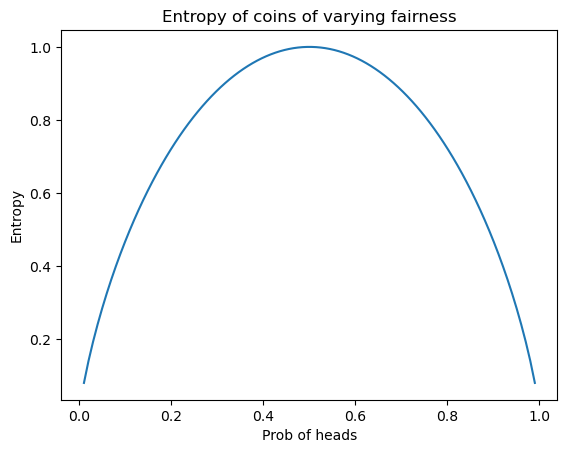

In [2]:
ph = np.linspace(0.01, 0.99, 100) # ph is probability of being a head
pt = 1 - ph
H = ph*np.log2(1/ph) + pt*np.log2(1/pt)
plt.plot(ph, H)
plt.xlabel("Prob of heads")
plt.ylabel("Entropy")
plt.title("Entropy of coins of varying fairness")

## Ex) Character Counts on The Internet
<img src = "CharHistogram.png">


In [3]:
fin = open("charcounts.txt")
counts = {s[0]:int(s[1::]) for s in fin.readlines()}
fin.close()
total = sum(counts.values())
probs = {c:x/total for c, x in counts.items()}
ps = np.array(list(probs.values()))
H = np.sum(ps*np.log2(1/ps))
print(H)

4.309987604900447


A <a href = "https://ursinus-cs174-s2023.github.io/CoursePage/Labs/Lab7_HuffmanTrees/">Huffman code</a> nearly achieves the entropy

In [4]:
huffman = {' ':"001",'.':"111101",'a':"1100",'b':"011001",'c':"10011",'d':"10010",'e':"000",'f':"110101",'g':"111100",'h':"01101",'i':"1010",'j':"011000110",'k':"0110000",'l':"11011",'m':"01000",'n':"1000",'o':"1011",'p':"111110",'q':"0110001111",'r':"0101",'s':"0111",'t':"1110",'u':"01001",'v':"1111110",'w':"1111111",'x':"01100010",'y':"110100",'z':"0110001110"}
avg_bits = 0
for c in huffman:
    avg_bits += probs[c]*len(huffman[c])
print(avg_bits)

4.328536459658267


# Cross-Entropy

The cross-entropy between a variable distributed as $q$ with respect to the probability distribution $p$ is defined as

### $H(p, q) = -\sum_{i} p_i \ln(q_i)$

### $H(p, q) = -E_p(\ln(q))$

In [5]:
q = np.array(list(probs.values()))
p = 1/len(probs) # Uniform distribution

-np.sum(p*np.log2(q))

5.556619931890913

One can prove (e.g. using lagrange multipliers)

### $H(p, q) \geq H(p)$


NOTE: Cross-Entropy is not necessarily symmetric:

### $H(p, q) \neq H(q, p)$ in general

In [6]:
-np.sum(q*np.log2(p))

4.807354922057605

# Kullback-Liebler Divergence

### $KL(p, q) = H(p, q) - H(p)$

### $KL(p, q) = -\sum_{i} p_i \ln(q_i) - p_i \ln(p_i)$

### $KL(p, q) = -\sum_{i} p_i \ln(q_i/p_i)$

### $KL(p, q) = \sum_{i} p_i \ln(p_i/q_i)$

### $KL(p, q) = E_p(\ln(p/q))$

We have a measurement of how different two different random variables are

Note that $KL(p, q) = 0$ iff $p$ and $q$ are the same distribution

We can use this as a loss function to encourage two distributions to be similar